# LAPTOP PRICE PREDICTION

# Business Problem
Predict the Price of laptop on the basis of

Context A dataset for 1300 laptop models.

Content, Company Name, Product Name, Laptop Type, Screen Inches, Screen Resolution, CPU Model, RAM Characteristics, Memory, GPU Characteristics, Operating System, Laptop's Weight, Laptop's Price

# Machine Learning Problem
It is a Regresion problem, for a given columns we need to predict the price of laptop.

## Performance Metric
1. R2 Score
2. Mean Absolute Error

## Reading data and basic stats

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df= pd.read_csv("E://projects unified mentor//laptop_prices.csv")
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [25]:
df.shape

(1275, 23)

In [33]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

 # Data cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [44]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [7]:
df.head(2)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000


In [31]:
df["Ram"]=df["Ram"].str.replace("GB","")

In [19]:
df["Weight"]=df["Weight"].str.replace("kg","")

In [57]:
df["Ram"]=df["Ram"].astype("int")

In [59]:
df["Weight"]=df["Weight"].astype("float")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   object 
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   object 
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

 # Exploratory Data Analysis and Feature Engineering

<Axes: xlabel='Price_euros', ylabel='Density'>

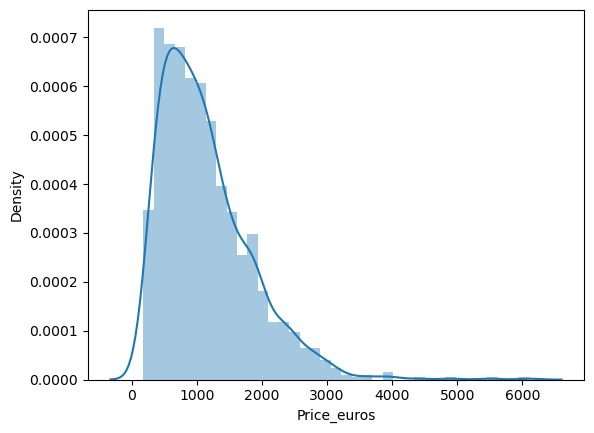

In [182]:
sns.distplot(df["Price_euros"])

<Axes: xlabel='Company'>

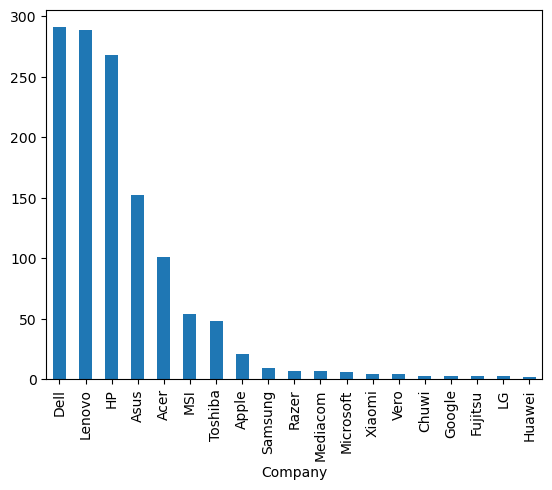

In [184]:
df["Company"].value_counts().plot(kind="bar")

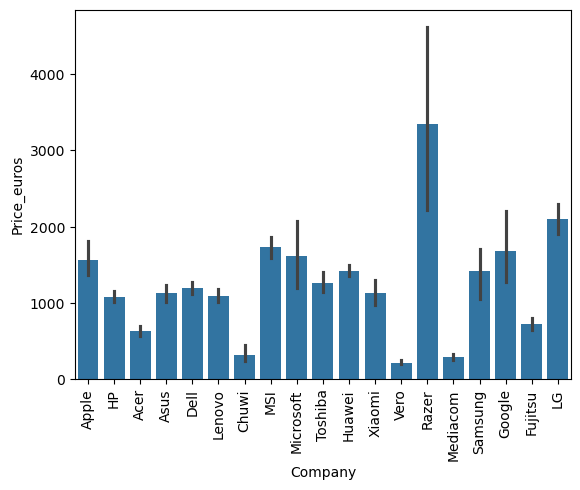

In [188]:
sns.barplot(x=df["Company"],y=df["Price_euros"])
plt.xticks(rotation="vertical")
plt.show()


In [ ]:
df["TypeName"].value_counts().plot(kind="bar")

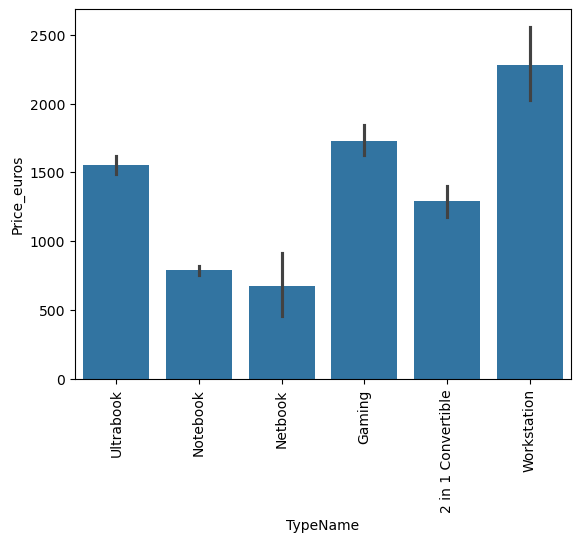

In [192]:
sns.barplot(x=df["TypeName"],y=df["Price_euros"])
plt.xticks(rotation="vertical")
plt.show()


<Axes: ylabel='Density'>

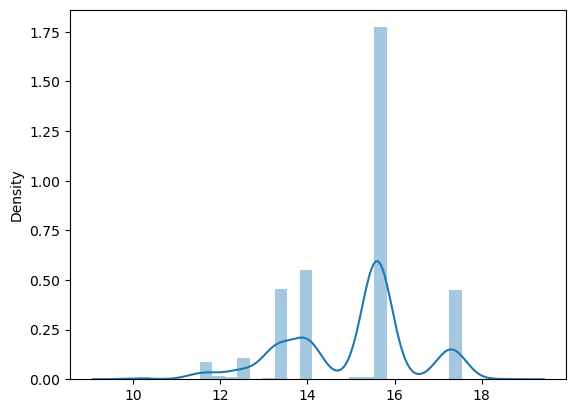

In [194]:
sns.distplot(x=df["Inches"])

<Axes: xlabel='Inches', ylabel='Price_euros'>

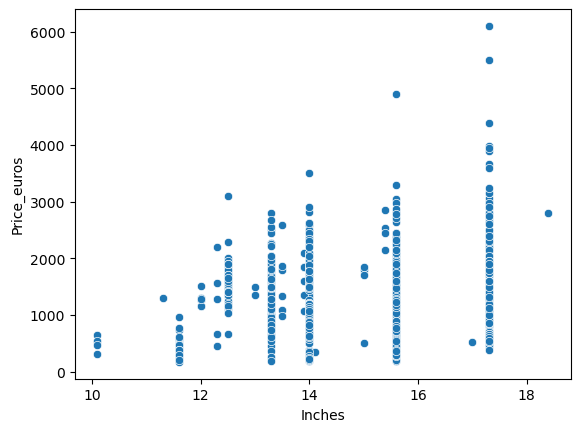

In [198]:
sns.scatterplot(x="Inches",y="Price_euros",data=df)

In [226]:
df["Screen"].value_counts()

Screen
Full HD        835
Standard       369
4K Ultra HD     43
Quad HD+        28
Name: count, dtype: int64

In [224]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [156]:
df["Full HD"]=df["Screen"].apply(lambda x:1 if "Full HD" in x else 0)

In [158]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Cpu brand,Full HD
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,Core i5,0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,Core i5,0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,AMD Processor,1
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,Core i7,0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,Core i5,0


<Axes: xlabel='Full HD', ylabel='Price_euros'>

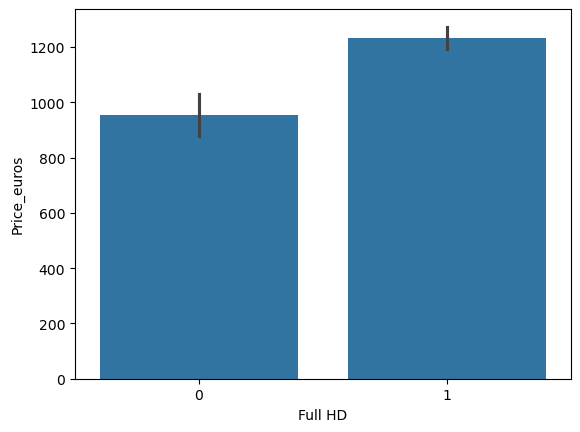

In [160]:
sns.barplot(x=df["Full HD"],y=df["Price_euros"])

In [152]:
 df["Screen"].str.split("x")

0       [Standard]
1       [Standard]
2        [Full HD]
3       [Standard]
4       [Standard]
           ...    
1270     [Full HD]
1271    [Quad HD+]
1272    [Standard]
1273    [Standard]
1274    [Standard]
Name: Screen, Length: 1274, dtype: object

In [150]:
temp= df["Screen"].str.split("x",n=1,expand=True)

In [148]:
df["CPU_model"].value_counts()

CPU_model
Core i5 7200U       193
Core i7 7700HQ      147
Core i7 7500U       133
Core i3 6006U        81
Core i7 8550U        73
                   ... 
Core M m3             1
E-Series E2-9000      1
Core M M3-6Y30        1
A6-Series 7310        1
A9-Series 9410        1
Name: count, Length: 92, dtype: int64

In [136]:
df["Cpu Name"] = df["CPU_model"].apply(lambda x:" ".join(x.split()[0:3]))

In [138]:
def fetch_processor(text):
    if text == 'Core i7' or text == 'Core i5' or text == 'Core i3':
        return text
    else:
        if text.split()[0] == '7200U':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [140]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [142]:
df.head(15)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Cpu Name,Cpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,Core i5,Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,Core i5,Core i5
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,Core i5 7200U,AMD Processor
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,Core i7,Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,Core i5,Core i5
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,Standard,1366,...,3.0,A9-Series 9420,500,0,HDD,No,AMD,Radeon R5,A9-Series 9420,AMD Processor
6,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,2139.97,Standard,2880,...,2.2,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics,Core i7,Core i7
7,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,1158.70,Standard,1440,...,1.8,Core i5,256,0,Flash Storage,No,Intel,HD Graphics 6000,Core i5,Core i5
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,1495.00,Full HD,1920,...,1.8,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150,Core i7 8550U,AMD Processor
9,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,1.60,770.00,Full HD,1920,...,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620,Core i5 8250U,AMD Processor


<Axes: xlabel='Cpu brand'>

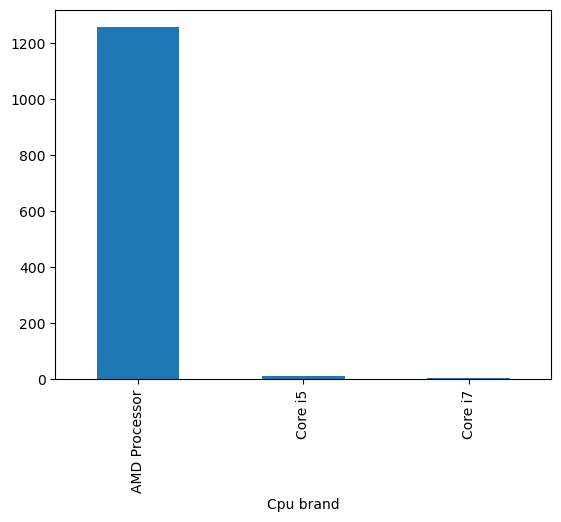

In [144]:
df["Cpu brand"].value_counts().plot(kind='bar')

In [146]:
df.drop(columns=["Cpu Name"],inplace=True)

In [324]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,Full HD,X_res,Cpu brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640,0,Standard,Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000,0,Standard,Core i5
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620,1,Full HD,AMD Processor
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,0,Standard,Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650,0,Standard,Core i5


<Axes: xlabel='Ram'>

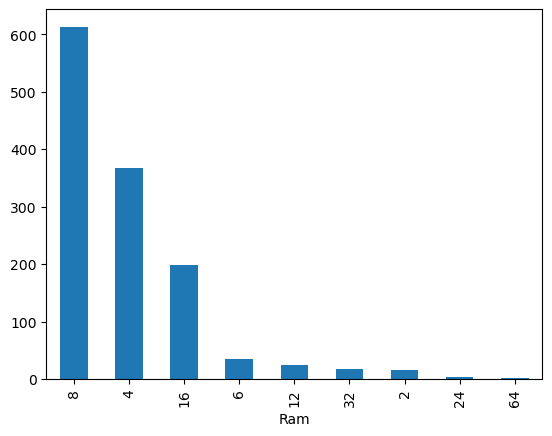

In [326]:
df["Ram"].value_counts().plot(kind="bar")

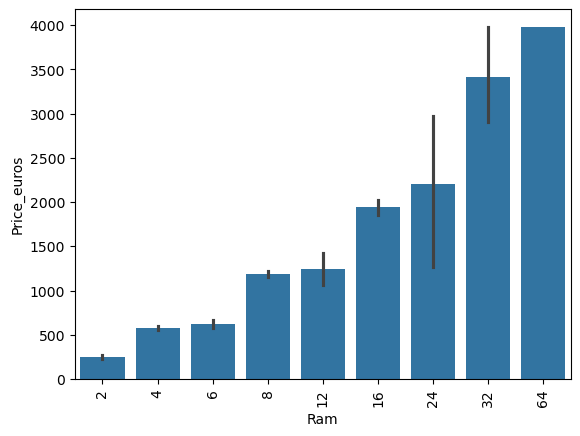

In [328]:
sns.barplot(x=df["Ram"],y=df["Price_euros"])
plt.xticks(rotation='vertical')
plt.show()

In [330]:
df["PrimaryStorage"].value_counts()

PrimaryStorage
256     508
1024    240
128     175
512     136
500     124
32       43
2048     16
64       15
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [338]:
df["GPU_company"].value_counts()

GPU_company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [128]:
df= df[df["GPU_company"] !="ARM"]

In [130]:
df["GPU_company"].value_counts()

GPU_company
Intel     704
Nvidia    396
AMD       174
Name: count, dtype: int64

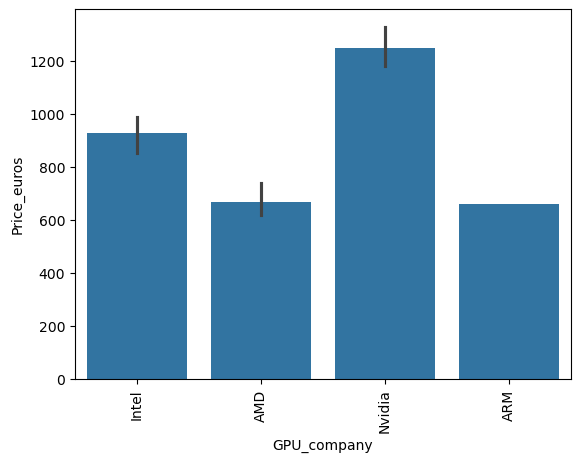

In [126]:
sns.barplot(x=df["GPU_company"],y=df["Price_euros"],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()


In [396]:
df["OS"].value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

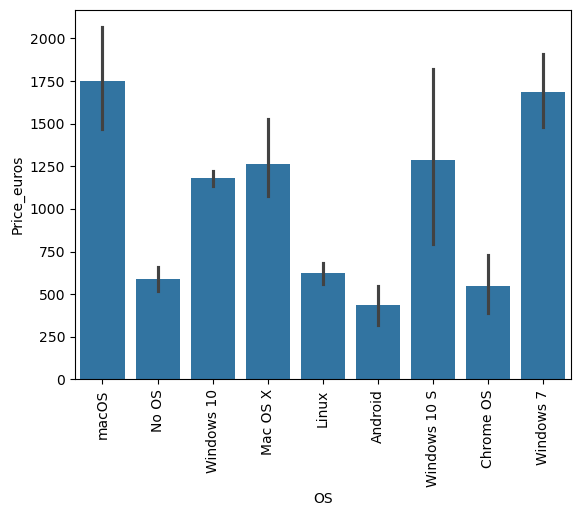

In [400]:
sns.barplot(x=df['OS'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

<Axes: xlabel='Weight', ylabel='Density'>

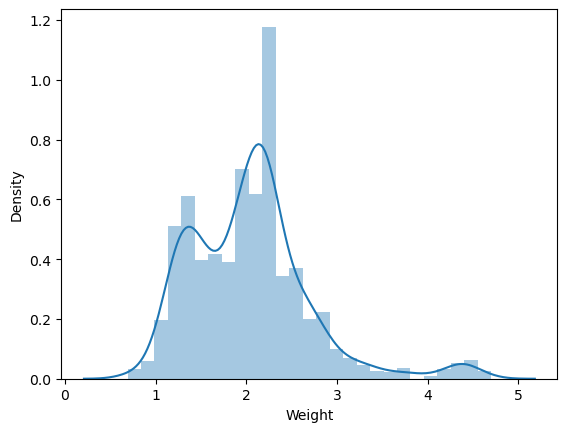

In [63]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price_euros'>

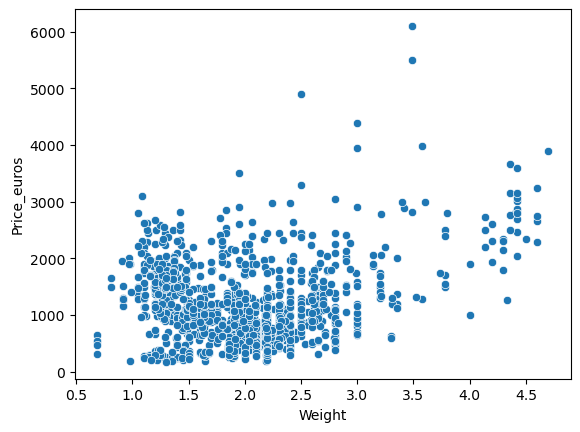

In [65]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])

In [67]:
df.corr(numeric_only=True)['Price_euros']


Inches              0.066608
Ram                 0.740287
Weight              0.211883
Price_euros         1.000000
ScreenW             0.552491
ScreenH             0.548529
CPU_freq            0.428847
PrimaryStorage     -0.124775
SecondaryStorage    0.291207
Name: Price_euros, dtype: float64

<Axes: >

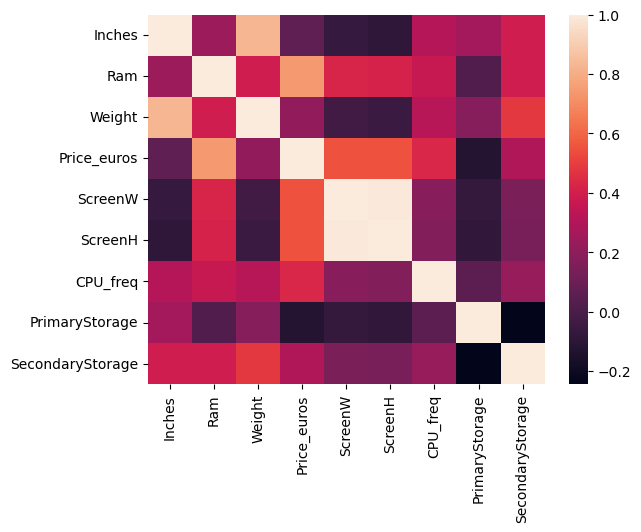

In [69]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price_euros', ylabel='Density'>

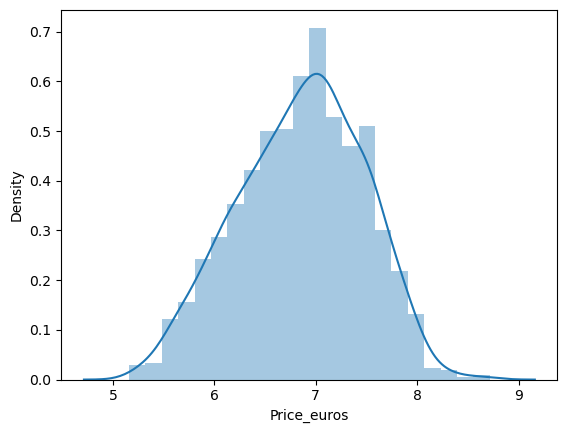

In [71]:
sns.distplot(np.log(df['Price_euros']))

# Model Selection

In [9]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

In [11]:
X

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,Full HD,1920,1080,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,Quad HD+,3200,1800,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,Standard,1366,768,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,Standard,1366,768,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [13]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1270    6.458338
1271    7.312553
1272    5.433722
1273    6.638568
1274    5.910797
Name: Price_euros, Length: 1275, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor

# Linear regression

In [108]:
X.select_dtypes(include="object").columns

Index(['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       'GPU_model'],
      dtype='object')

In [21]:
categorical_cols=[0,1,2,5,7,10,11,12,13,15,18,19,20,21]
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),categorical_cols)
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8703597556591763
MAE 0.1808408157449526


 # KNN

In [191]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),categorical_cols)
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8418290925552823
MAE 0.19255014328012812


# Decision Tree 

In [194]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),categorical_cols)
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8347569026789495
MAE 0.18953978071925515


# SVM

In [202]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),categorical_cols)
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073926241286474
MAE 0.21725898539733401


# Random Forest

In [204]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),categorical_cols)
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8979535063229638
MAE 0.15677471641282723


# Extra Trees

In [33]:
step1= ColumnTransformer(transformers=[
('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),categorical_cols)
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8996361444936346
MAE 0.15558259740859662


# Stacking

In [35]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),categorical_cols)
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    #('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))




KeyboardInterrupt

